# Анализ данных на Python

*Алла Тамбовцева*

## Обработка таблиц внутри HTML с pandas

Если нас интересуют все таблицы в исходном коде HTML, библиотека `bs4` нам не понадобится, достаточно импортировать модуль `requests` для отправки запроса и библиотеку `pandas` для поиска фрагментов HTML с таблицами и превращения их в датафреймы:

In [1]:
import requests
import pandas as pd

Отправим запрос для [страницы](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index) Википедии, на которой встречаются таблицы:

In [2]:
url = "https://en.wikipedia.org/wiki/The_Economist_Democracy_Index"
page = requests.get(url)

Заберём исходный код страницы через `text` и подадим его на вход функции `read_html()` из `pandas`:

In [3]:
tabs = pd.read_html(page.text)
print(type(tabs), type(tabs[0]))

<class 'list'> <class 'pandas.core.frame.DataFrame'>


Функция `read_html()` находит в строке с кодом HTML все фрагменты в тэгах `<table></table>`, преобразует их в датафреймы и возвращает список датафреймов. Выберем первый элемент:

In [4]:
# очень маленькая таблица, на странице это даже половина от таблицы
tabs[0]

,0,1,2,3,4
0,Full democracies .mw-parser-output .legend{pag...,Flawed democracies 7.00–7.99 6.00–6.99,Hybrid regimes 5.00–5.99 4.00–4.99,Authoritarian regimes 3.00–3.99 2.00–2.99 1.00...,No data


Выберем таблицу побольше:

In [5]:
tabs[3]

,Region,Coun­tries,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
0,Western Europe,21,8.37,8.36,8.23,8.29,8.35,8.35,8.38,8.40,8.42,8.41,8.41,8.44,8.40,8.45,8.61,8.60
1,North America,2,8.27,8.37,8.36,8.58,8.59,8.56,8.56,8.56,8.56,8.59,8.59,8.59,8.59,8.63,8.64,8.64
2,Latin America and the Caribbean,24,5.68,5.79,5.83,6.09,6.13,6.24,6.26,6.33,6.37,6.36,6.38,6.36,6.35,6.37,6.43,6.37
3,Central and Eastern Europe,28,5.37,5.39,5.36,5.36,5.42,5.42,5.40,5.43,5.55,5.58,5.53,5.51,5.50,5.55,5.67,5.76
4,Asia and Australasia,28,5.21,5.46,5.62,5.67,5.67,5.67,5.63,5.74,5.74,5.70,5.61,5.56,5.51,5.53,5.58,5.44
5,Sub-Saharan Africa,44,4.04,4.14,4.12,4.16,4.26,4.36,4.35,4.37,4.38,4.34,4.36,4.33,4.32,4.23,4.28,4.24
6,Middle East and North Africa,20,3.23,3.34,3.41,3.44,3.53,3.54,3.54,3.56,3.58,3.65,3.68,3.73,3.62,3.52,3.48,3.54
7,World,167,5.23,5.29,5.28,5.37,5.44,5.48,5.48,5.52,5.55,5.55,5.53,5.52,5.49,5.46,5.55,5.52


Ура! Есть готовый датафрейм, для получения которого нам даже не пришлось ничего парсить. 

**Важно:** функция `read_html()` принимает на вход строки с кодом HTML, не объекты типа BeautifulSoup. Объект типа `BeautifulSoup` можно превратить в строку через стандартную функцию `str()`.

Поработаем с полученным датафреймом – построим график для визуализации динамики индекса. Для этого таблицу необходимо транспонировать, чтобы по столбцам были индексы для разных регионов, а каждая строка соответствовала одному году. Перенесём названия регионов `Region` в названия строк, чтобы затем они стали названиями стоблцов и «не путались» с числовыми значениями индексов:

In [6]:
tab = tabs[3]

In [7]:
# уберем лишние столбцы сразу
# тут очень внезапно с Coun­tries – нужно копировать прямо из датафрейма 

tab.index = tab["Region"]
tab.drop(columns = ["Region", "Coun­tries"], inplace = True)
tab

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
Region,,,,,,,,,,,,,,,,
Western Europe,8.37,8.36,8.23,8.29,8.35,8.35,8.38,8.40,8.42,8.41,8.41,8.44,8.40,8.45,8.61,8.60
North America,8.27,8.37,8.36,8.58,8.59,8.56,8.56,8.56,8.56,8.59,8.59,8.59,8.59,8.63,8.64,8.64
Latin America and the Caribbean,5.68,5.79,5.83,6.09,6.13,6.24,6.26,6.33,6.37,6.36,6.38,6.36,6.35,6.37,6.43,6.37
Central and Eastern Europe,5.37,5.39,5.36,5.36,5.42,5.42,5.40,5.43,5.55,5.58,5.53,5.51,5.50,5.55,5.67,5.76
Asia and Australasia,5.21,5.46,5.62,5.67,5.67,5.67,5.63,5.74,5.74,5.70,5.61,5.56,5.51,5.53,5.58,5.44
Sub-Saharan Africa,4.04,4.14,4.12,4.16,4.26,4.36,4.35,4.37,4.38,4.34,4.36,4.33,4.32,4.23,4.28,4.24
Middle East and North Africa,3.23,3.34,3.41,3.44,3.53,3.54,3.54,3.56,3.58,3.65,3.68,3.73,3.62,3.52,3.48,3.54
World,5.23,5.29,5.28,5.37,5.44,5.48,5.48,5.52,5.55,5.55,5.53,5.52,5.49,5.46,5.55,5.52


Транспонируем:

In [8]:
tab = tab.transpose()
tab

Region,Western Europe,North America,Latin America and the Caribbean,Central and Eastern Europe,Asia and Australasia,Sub-Saharan Africa,Middle East and North Africa,World
2023,8.37,8.27,5.68,5.37,5.21,4.04,3.23,5.23
2022,8.36,8.37,5.79,5.39,5.46,4.14,3.34,5.29
2021,8.23,8.36,5.83,5.36,5.62,4.12,3.41,5.28
2020,8.29,8.58,6.09,5.36,5.67,4.16,3.44,5.37
2019,8.35,8.59,6.13,5.42,5.67,4.26,3.53,5.44
2018,8.35,8.56,6.24,5.42,5.67,4.36,3.54,5.48
2017,8.38,8.56,6.26,5.40,5.63,4.35,3.54,5.48
2016,8.40,8.56,6.33,5.43,5.74,4.37,3.56,5.52
2015,8.42,8.56,6.37,5.55,5.74,4.38,3.58,5.55
2014,8.41,8.59,6.36,5.58,5.70,4.34,3.65,5.55


Наносим на график линии для динамики по каждому региону:

In [9]:
from matplotlib import pyplot as plt

In [10]:
# забираем год, после транспонирования в названиях строк
# значения по регионам и по миру

# да, здесь можно зациклить, но тут надо подумать,
# чтобы в цикле еще подписи к линиям в коде ниже тоже добавлялись,
# оставлю пока как есть

year = list(tab.index)
we = tab["Western Europe"].values
na = tab["North America"].values
la = tab["Latin America and the Caribbean"].values
ce = tab["Central and Eastern Europe"].values
aa = tab["Asia and Australasia"].values
ssa = tab["Sub-Saharan Africa"].values
me = tab["Middle East and North Africa"].values
ww = tab["World"].values

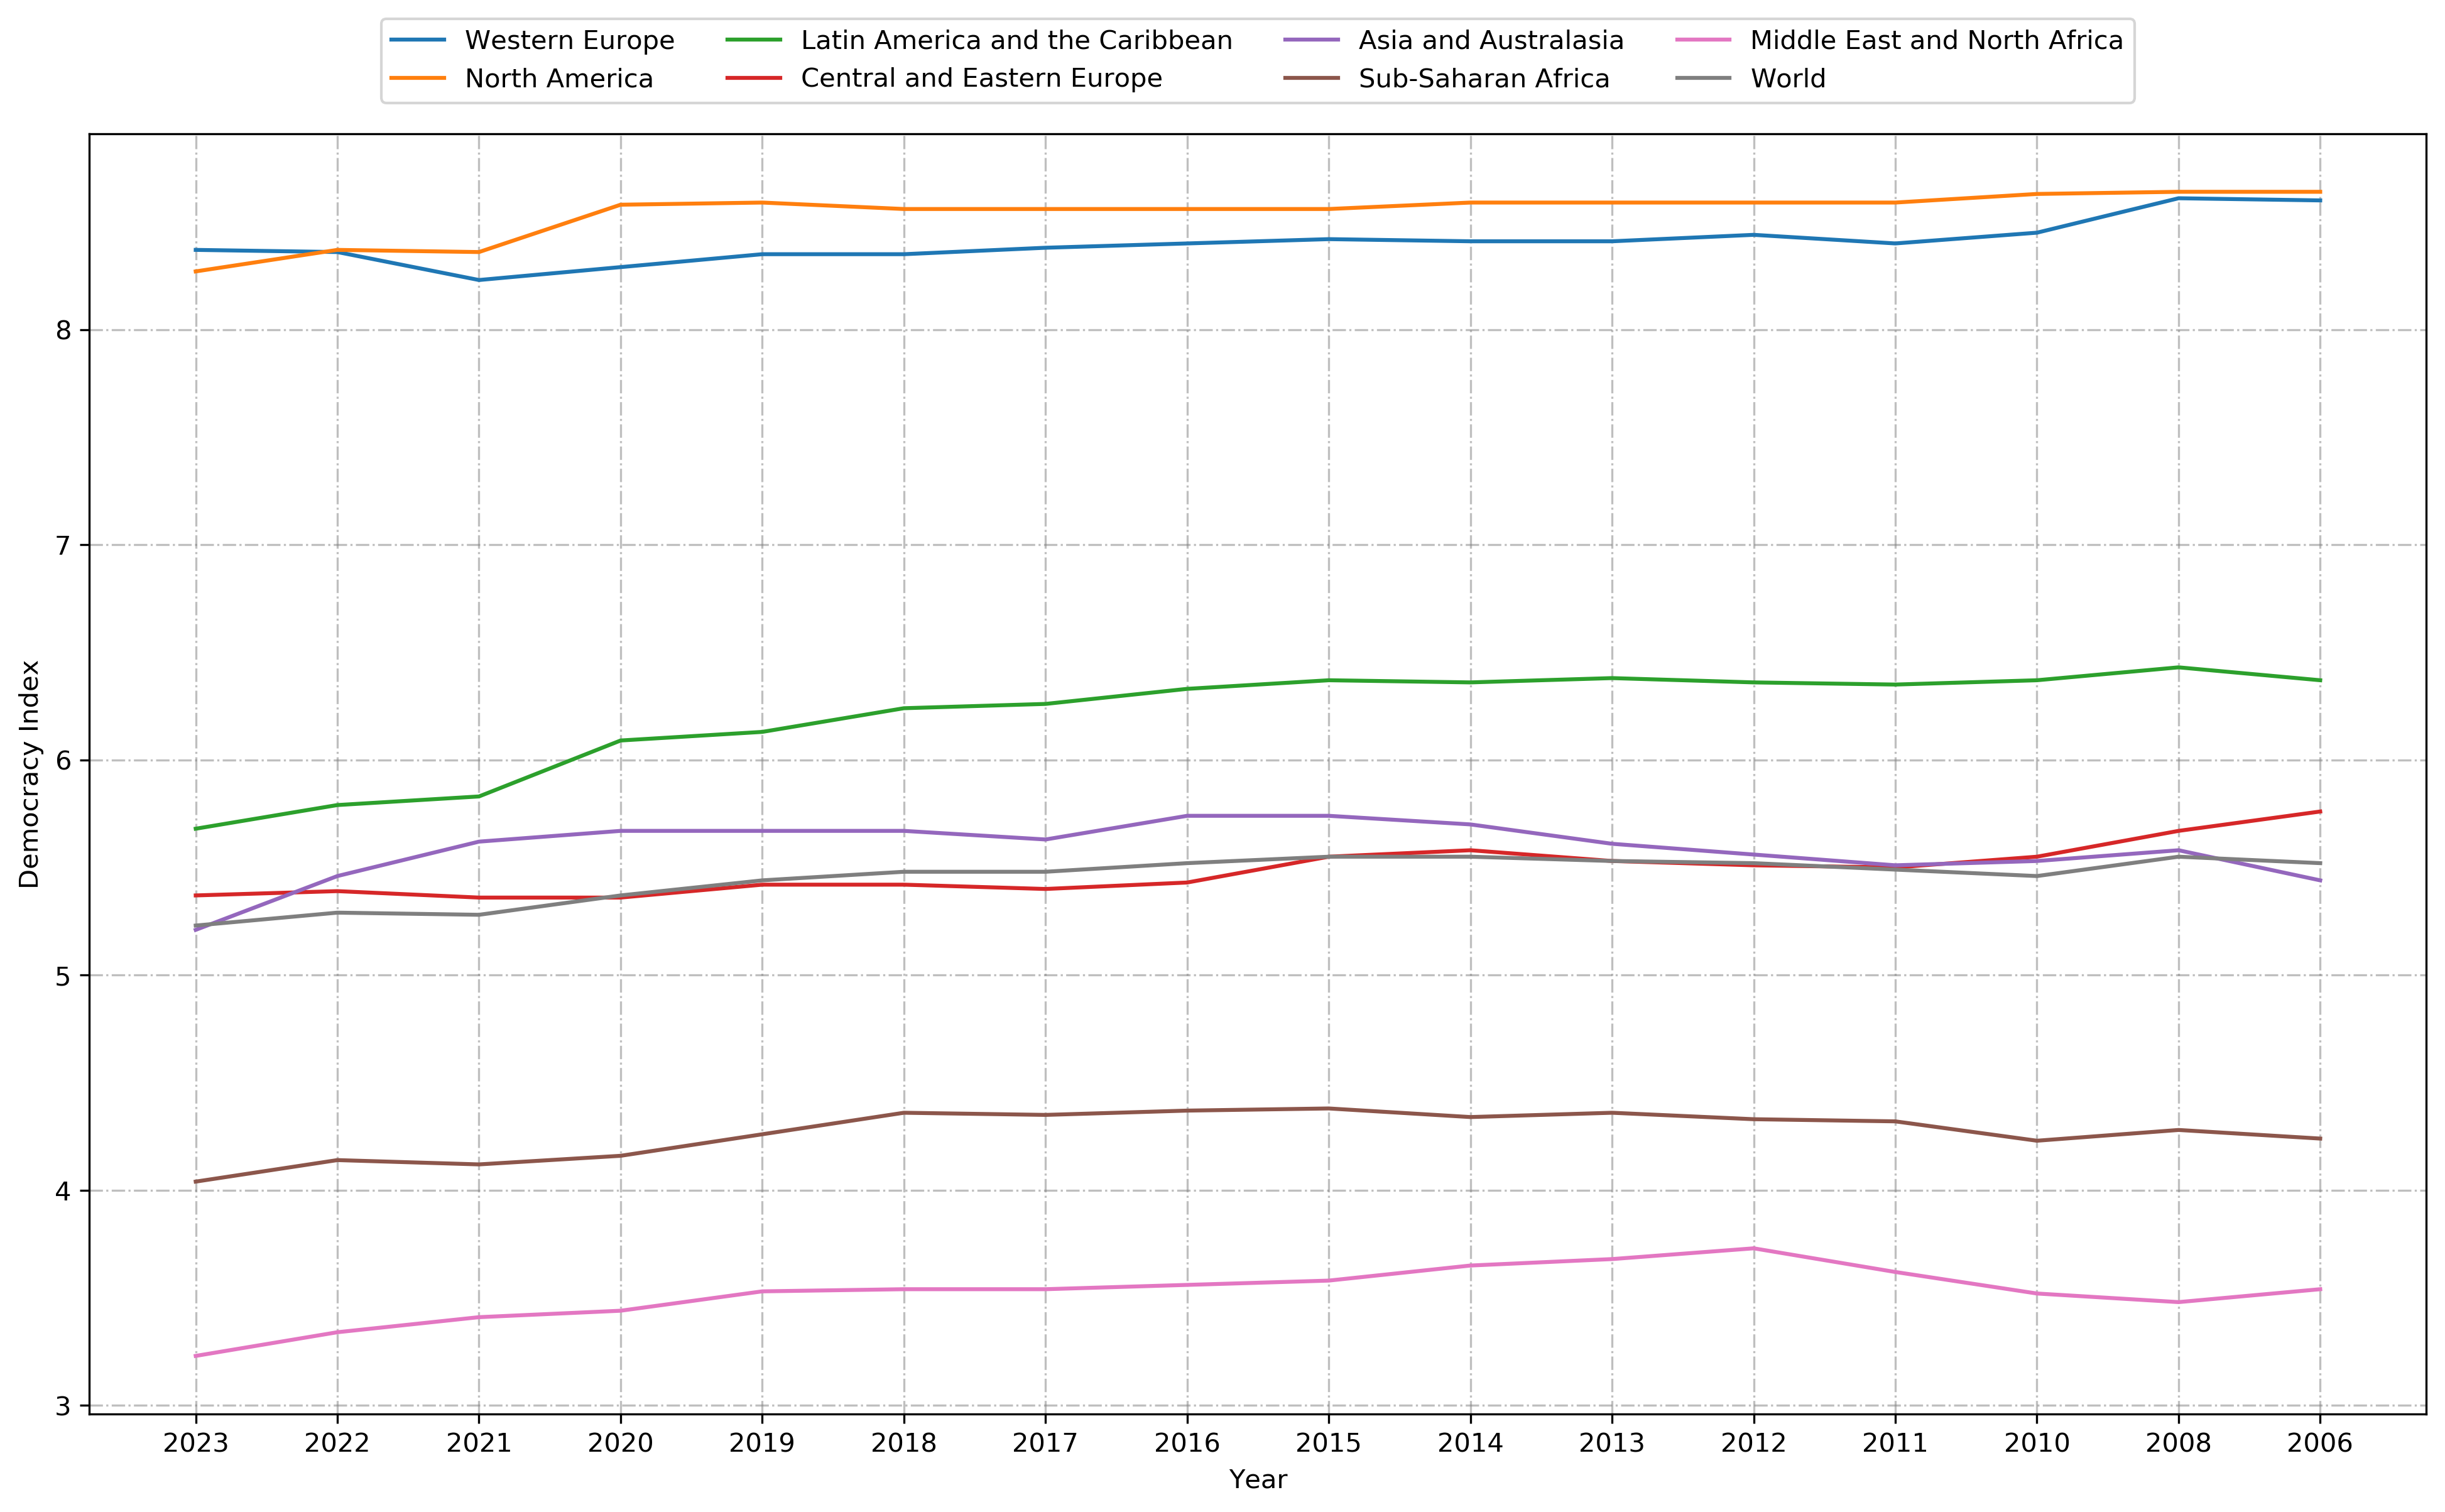

In [11]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.grid(linestyle = "-.", color = "grey", alpha = 0.5)
ax.set_axisbelow(True)

# линейные графики с подписями 
# label затем отобразятся в легенде legend()

ax.plot(year, we, label = "Western Europe");
ax.plot(year, na, label = "North America");
ax.plot(year, la, label = "Latin America and the Caribbean");
ax.plot(year, ce, label = "Central and Eastern Europe");
ax.plot(year, aa, label = "Asia and Australasia");
ax.plot(year, ssa, label = "Sub-Saharan Africa");
ax.plot(year, me, label = "Middle East and North Africa");
ax.plot(year, ww, label = "World");

# подписи по осям
ax.set_xlabel("Year");
ax.set_ylabel("Democracy Index");

# добавляем легенду, регулируем положение
# четыре столбца в легенде
# сдвиг легенды bbox_to_anchor, 0.5 – положение по оси x (центр),
# 1.1 – положение по оси y (выше границы графика = 1)

ax.legend(loc='upper center', ncol = 4, bbox_to_anchor = (0.5, 1.1));